
# Exploration_07 Project
[ E-07 ]Shallow_focus : Semitic Segmentation

# 루브릭 평가기준

---
평가문항	상세기준
---
---
1. 인물모드 사진을 성공적으로 제작하였다.

- 아웃포커싱 효과가 적용된 본인의 인물모드 사진과 고양이 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다.
---
2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.
- 인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다.
---
3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.
- 추가적인 depth 정보를 활용하여 semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 구체적으로 제시하였다.

---
목표
---
- ### 인물사진 모드를 구현해보자



학습목표
---
딥러닝을 적용하여 핸드폰 인물 사진 모드를 따라 해 보자.

목차
---
1. 들어가며
2. 셸로우 포커스 만들기 (1) 사진을 준비하자
3. 셸로우 포커스 만들기 (2) 세그멘테이션으로 사람 분리하기
4. 셸로우 포커스 만들기 (3) 시맨틱 세그멘테이션 다뤄보기
5. 셸로우 포커스 만들기 (4) 배경 흐리게 하기
6. 셸로우 포커스 만들기 (5) 흐린 배경과 원본 영상 합성
7. 프로젝트: 인물 모드 문제점 찾기
8. 프로젝트 제출


### 폴더 생성

- mkdir -p ~/aiffel/human_segmentation/models # 모델 폴더 생성
- mkdir -p ~/aiffel/human_segmentation/images # 이미지 폴더 생성


사진 다운로드 후 파일 변화시
[jpg->png 변환](https://convertio.co/kr/)


### 인물사진 모드

1. 배경이 있는 셀카를 촬영합니다. (배경과 사람의 거리가 약간 멀리 있으면 좋습니다.)
2. 시맨틱 세그멘테이션(Semantic segmentation)으로 피사체(사람)와 배경을 분리합니다.
3. 블러링(blurring) 기술로 배경을 흐리게 합니다.
4. 피사체를 배경의 원래 위치에 합성합니다.


# 픽한 사진은 윤하셀카사진
![픽한 사진은 - 윤아셀카사진](https://image.xportsnews.com/contents/images/upload/article/2017/0424/1493009648442114.png)

# 디렉터리 구조
- ## models
- ## images

# 이미지를 클라우드에 업로드
- ## 디렉토리에 맞게 이미지 네임도 변경해주세요
- ## 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
- ## img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'



In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('성공')

성공


(726, 550, 3)


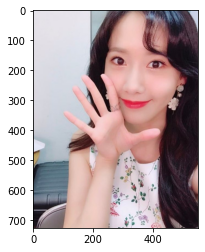

In [3]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 배경에만 렌즈 흐림 효과
- 이미지 세그멘테이션(image segmentation)
- 이미지에서 픽셀 단위로 관심 객체를 추출하는 방법

- 시맨틱 세그멘테이션(semantic segmentation)
- 우리가 인식하는 세계처럼 물리적 의미 단위로 인식하는 세그멘테이션

# PixelLib에서 제공해 주는 모델을 다운로드합니다.
- 픽셀단위로 관심 객체를 추출하기 때문에 필요

In [4]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f1854ab2280>)

# 다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성

In [6]:
# 모델 생성
# 모델 로드
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
# 모델이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

# PASCAL VOC 데이터의 라벨 종류
- PASCAL VOC 프로젝트:
- 객체 클래스 인식을 위한 표준화된 이미지 데이터 세트 제공
- 데이터 세트 및 주석 액세스를 위한 공통 도구 세트 제공
- 다양한 방법의 평가 및 비교 가능 
- 성능 평가 시 문제 발생 객체 클래스 인식(2005-2012년, 현재 완료)

In [15]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

# 사람의 이미지만 추출할 것이기 때문에 사람(person)이 몇번째에 위치한지 파악
- 21중 16번째 0번부터 시작해서 15번째에 해당된다
- person이 있는 걸 확인

In [14]:
'person' in LABEL_NAMES

True

# 모델에서 나온 출력값

## 마스크 처리 : 사람부분만 마스크 처리

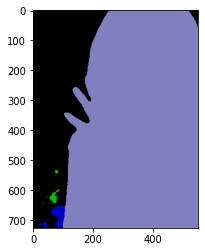

In [16]:
plt.imshow(output)
plt.show()

# 클래스의 id를 1차 행배열로 표시
## 마스크 영역 배열 : 참과 거짓으로 표시

In [17]:
segvalues

{'class_ids': array([ 0,  9, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

# for문을 활용하여 class_ids 나타나는 클래스를 찾음
- background
- chair
- person
- sofa

>소파랑 체어가 있었나?

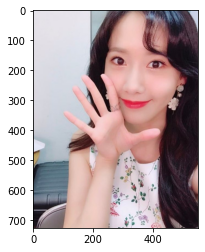

In [19]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

>어? 있었네 나도 잘 못 본걸 알려주는 거나 신기하네요
다시 보니 기분이 좋아집니다.
소파인지는 명확하지 않지만 소파같은 게 있네요.
의자가 있었나? 라고 생각이 들었는데 있네요
이런 걸 보니 참 잘 파악하고 있다는 생각이 듭니다.

In [18]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
sofa


In [20]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

# 이제 물체마다 output에 어떤 색상으로 나타나 있는지?
## 사람의 인덱스 번호는 15입니다.
- ### 15의 대한 배열을 확인

In [21]:
colormap[15]

array([192, 128, 128])

In [22]:
seg_color = (128,128,192)

# 주의할 것은 output 이미지가 BGR 순서로 채널 배치가 되어 있다는 점

# colormap은 RGB 순서
## 위에는 colormap 사용
## output 이미지 BGR 순서 <-> colormap RGB
- ## [중요]중간에 G는 그대로 있고 R과 B의 위치가 바뀌어야 합니다.


# seg_color로만 이루어진 마스크 : 인물영역(흰색), 배경영역(흑색)

(726, 550)


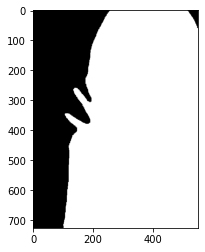

In [23]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [25]:
seg_color = (192,128,128)

# output 의 BGR로 컬러를 변경했더니 지금과 같은 흑백으로 바뀌였다.

(726, 550)


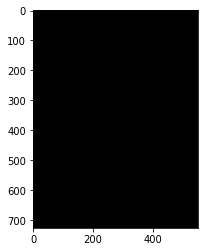

In [27]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [29]:
#다시 RGB로 바꿨다
seg_color = (128,128,192)

(726, 550)


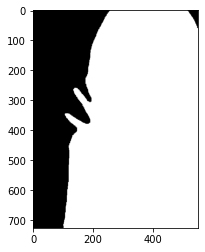

In [30]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

# 원래 이미지와 겹쳐 보면 세그멘테이션이 얼마나 잘 되었는지 

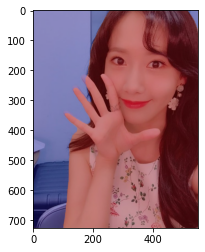

In [38]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0) # 값을 조정해 볼 수 있다

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 셸로우 포커스 만들기 / 배경 흐리게 하기
## blur() 함수를 사용해서 배경을 흐리게 처리

- ##  img_orig_blur = cv2.blur(img_orig, (1,50))  # (가로,세로) 좌우,상하로 흔들어주는 처리
- ##  img_orig_blur = cv2.blur(img_orig, (1,50))  # (가로,세로) 값을 바꿔보면 흔들리는 듯한 처리가 됨

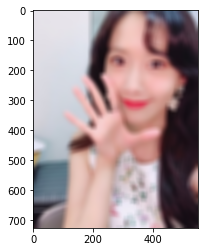

In [53]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  # 값을 상향해서 기존 13에서 20으로 변경 - blur처리한 느낌이 더 나도록 조정 #30으로 값을 높이면 인물(주변이미지)에 영향이 가는 것을 볼 수 있다. 20이하 정도가 좋은 것 같다
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
---
- ## bitwise_not 함수를 이용하면 이미지가 반전
- ## 마스크에서는 배경이 0, 사람이 255
- ## bitwise_not 연산을 하고 나면 배경은 255, 사람은 0
---
- ## bitwise_and 연산을 수행하면 배경만 있는 영상을 얻음
- ## 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에
- ## 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다

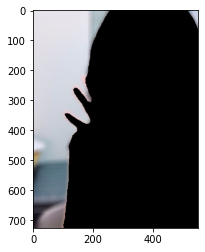

In [54]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 배경 영상과 사람 영상을 합치기

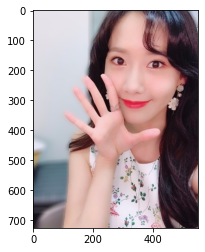

In [55]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

- ## 흐린 배경과 인물 사진이 조화롭게 보이는 것을 확인 할 수 있다.

## numpy.nywhere(조건, [x, y, ]/)
## 조건에 따라 x 또는 y에서 선택한 요소를 반환하십시오.

# 윤아의 이 사진으로 해볼까?
![윤아바다사진](http://img.insight.co.kr/static/2018/01/08/700/2q1vl4ls6pclq94cnaqn.jpg)

In [70]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('성공')

성공


(1053, 690, 3)


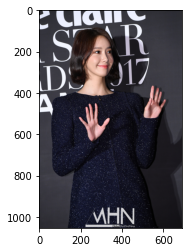

In [71]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/yun1.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [72]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f17ca4e33a0>)

In [73]:
# 모델 생성
# 모델 로드
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [74]:
# 모델이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)


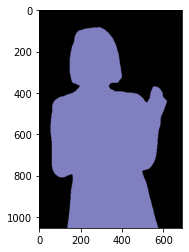

In [75]:
plt.imshow(output)
plt.show()


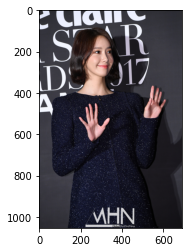

In [76]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()


In [77]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])


background
person


In [78]:
colormap[15]

array([192, 128, 128])

In [79]:
seg_color = (128,128,192)

(1053, 690)


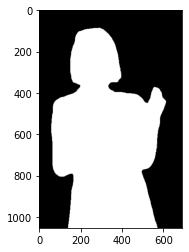

In [80]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

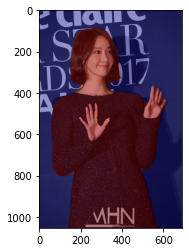

In [81]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0) # 값을 조정해 볼 수 있다

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


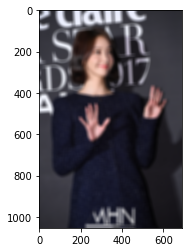

In [82]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  # 값을 상향해서 기존 13에서 20으로 변경 - blur처리한 느낌이 더 나도록 조정 #30으로 값을 높이면 인물(주변이미지)에 영향이 가는 것을 볼 수 있다. 20이하 정도가 좋은 것 같다
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

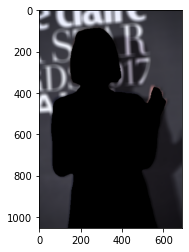

In [83]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 원본사진

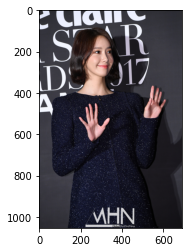

In [85]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 배경 흐림 적용 사진

윤하 사진


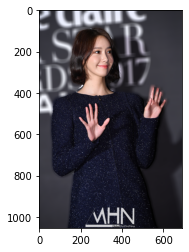

배경 흐림적용 성공


In [89]:
print('윤하 사진')
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()
print('배경 흐림적용 성공')


# 다른 사진 해보기

In [90]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('성공')

성공


(500, 500, 3)


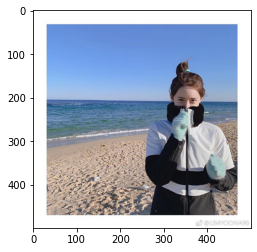

In [129]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/yun2.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [130]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f18245c7e50>)

In [131]:
# 모델 생성
# 모델 로드
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [132]:
# 모델이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

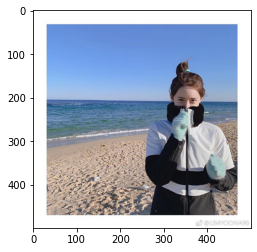

In [133]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [98]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
person


# bottle? 바닥에 있는 걸 인식한 것 같다

In [157]:
colormap[15]

array([192, 128, 128])

In [158]:
seg_color = (128,128,192)

(500, 500)


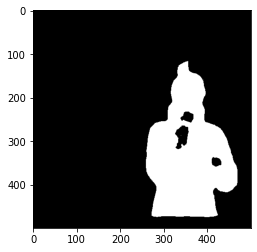

In [159]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()


# 문제점 발견 바로 장갑 부분이 마스크 처리가 잘 안되었다는 것
- 장갑 클래스가 없어서 발생하는 문제점
- 장갑을 인식하지 못함
- 장갑부분을 bottle로 인식하는 것 같아서 colormap[5] 배열을 가지고 왔다.

# 해결방법
- 기존 seg_map에 seg_map + seg_map2를 적용하여 덥어씌우기를 하였다.

# bottle 위치 마스크 추가

In [160]:
colormap[5] 

array([128,   0, 128])

In [161]:
seg_color1 = (128,0,128)

(500, 500)


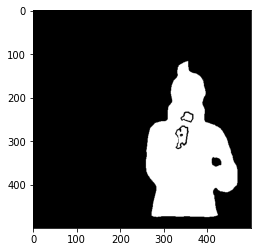

In [162]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = seg_map + seg_map2
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()


# 위와 같이 장갑부분에 마스킹이 된 것을 볼 수 있다.

# NOTE : 문제점 발생 : 장갑부분이 마스킹처리가 안되었다.
## 해결책을 제시 했으나 완벽한 해결방법은 아니라서 더 연구가 필요하다

# FIXME : 마스크 적용이 장갑부분에서는 안된 걸로 보인다.

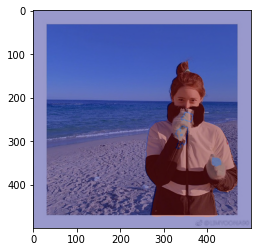

In [163]:

img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0) # 값을 조정해 볼 수 있다

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

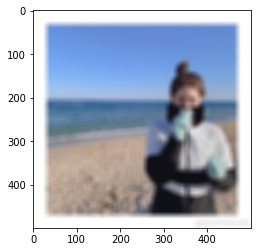

In [164]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (15,15))  # 값을 상향해서 기존 13에서 15으로 변경 - blur처리한 느낌이 더 나도록 조정 #30으로 값을 높이면 인물(주변이미지)에 영향이 가는 것을 볼 수 있다. 20이하 정도가 좋은 것 같다
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

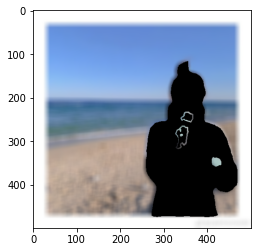

In [165]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 위와 같이 장갑부분에 마스크 처리 된 것을 볼 수 있다

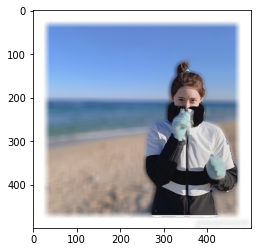

아쉽게도 장갑에는 마스크가 잘 적용이 안되서 완벽한 인물사진모드를 만들지는 못했다.


In [166]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()
print('아쉽게도 장갑에는 마스크가 잘 적용이 안되서 완벽한 인물사진모드를 만들지는 못했다.')

# 그래서 장갑에도 흐린효과가 적용이 되었다.

# 마지막 사진

In [168]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('성공')

성공


(803, 635, 3)


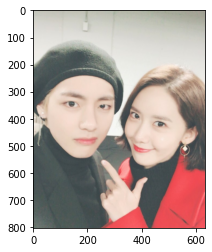

In [169]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/vyun.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 뷔와 윤아가 등장

In [170]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f17ca163340>)

In [171]:
# 모델 생성
# 모델 로드
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [172]:
# 모델이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

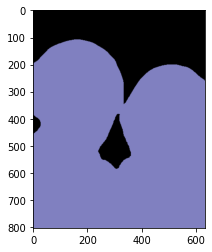

의도한 것은 아니지만 뭔가 하트 모양 같다


In [173]:
plt.imshow(output)
plt.show()
print('의도한 것은 아니지만 뭔가 하트 모양 같다')

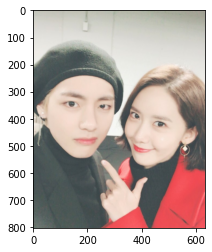

In [117]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [174]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


# 클래스가 굉장히 명확하게 나왔다.

In [175]:
colormap[15]

array([192, 128, 128])

In [176]:
seg_color = (128,128,192)

(803, 635)


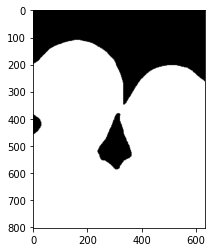

In [177]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

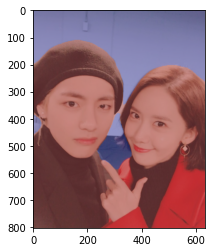

In [178]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0) # 값을 조정해 볼 수 있다

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

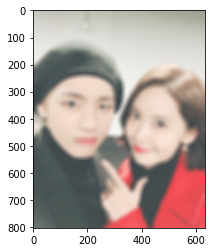

In [179]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  # 값을 상향해서 기존 13에서 20으로 변경 - blur처리한 느낌이 더 나도록 조정 #30으로 값을 높이면 인물(주변이미지)에 영향이 가는 것을 볼 수 있다. 20이하 정도가 좋은 것 같다
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

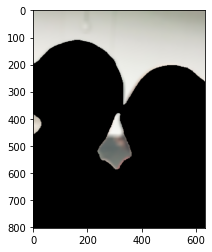

In [180]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

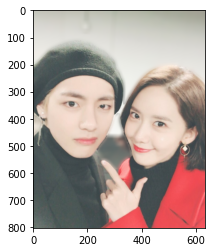

뷔와 윤하 콜라보 완성, 배경흐림적용 성공


In [182]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()
print('뷔와 윤하 콜라보 완성, 배경흐림적용 성공')

# 고양이 사진

In [8]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('성공')

성공


(562, 750, 3)


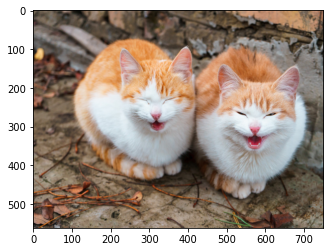

In [9]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()


In [27]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fd9638ca520>)

In [11]:
# 모델 생성
# 모델 로드
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [12]:
# 모델이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

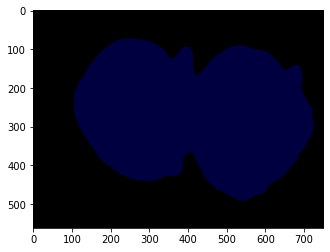

In [13]:
plt.imshow(output)
plt.show()

In [14]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [15]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [16]:
'cat' in LABEL_NAMES

True

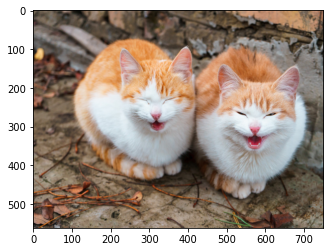

In [17]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
segvalues

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [19]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [20]:
colormap[8]

array([64,  0,  0])

In [21]:
seg_color = (0,0,64)

(562, 750)


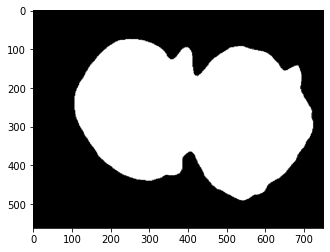

In [22]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

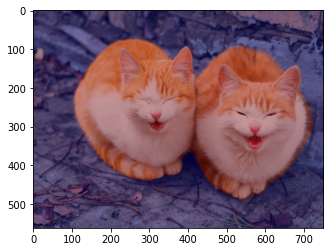

In [23]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0) # 값을 조정해 볼 수 있다

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


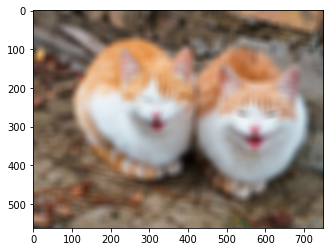

In [24]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  # 값을 상향해서 기존 13에서 20으로 변경 - blur처리한 느낌이 더 나도록 조정 #30으로 값을 높이면 인물(주변이미지)에 영향이 가는 것을 볼 수 있다. 20이하 정도가 좋은 것 같다
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

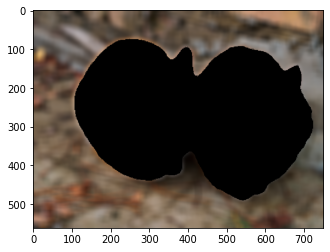

In [25]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

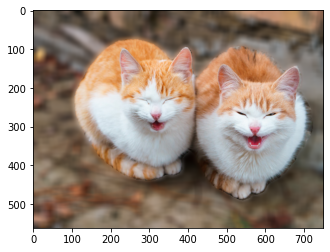

In [26]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 완성

# 배경전환 크로마키

In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('성공')

성공


In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb27884afa0>)

(562, 750, 3)


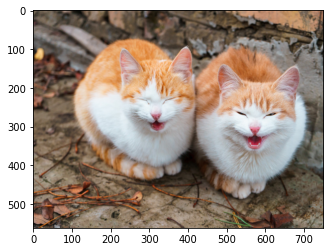

In [5]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(768, 1024, 3)


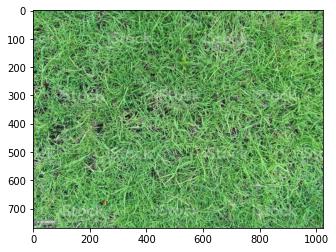

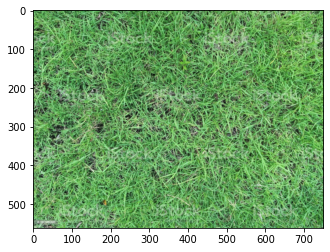

In [6]:
# 배경 이미지
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/ground.jpg'  
img_orig2 = cv2.imread(img_path2) 

print(img_orig2.shape)
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()

resize_img = cv2.resize(img_orig2,(750,562), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(img_path)

In [8]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)

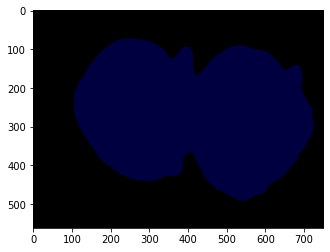

In [9]:
plt.imshow(output)
plt.show()

(562, 750)


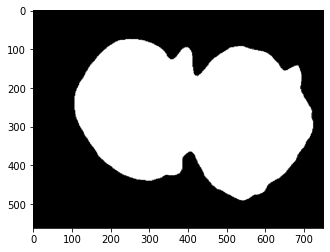

In [11]:
seg_color = (0,0,64)

seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

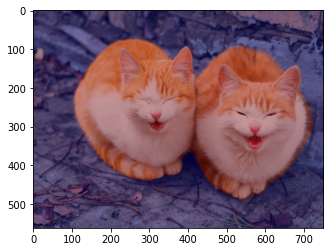

In [12]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

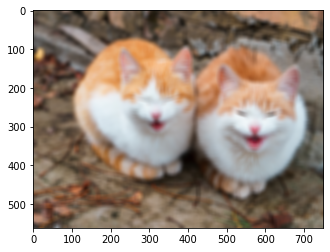

In [13]:
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

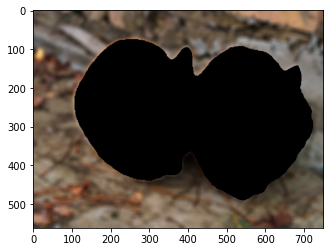

In [14]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

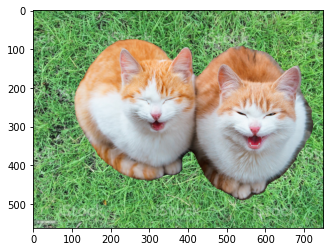

In [15]:
img_concat = np.where(img_mask_color==255, img_orig, resize_img)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

>문제점 1)
클래스로 등록이 안되어 있던 장갑부분이 마스킹처리가 안되었다는 점 / 
bottle로 인식되어 있었다.

<img src = "https://8888-wta96x1n0qghs062898a846dh.e.prod.connect.ainize.ai/files/aiffel/human_segmentation/images/er.png" width = "400" height = "400">

<img src = "https://8888-wta96x1n0qghs062898a846dh.e.prod.connect.ainize.ai/files/aiffel/human_segmentation/images/er-1.png" width = "400" height = "400">


> 해결방법 1)
bottle로 인식되어 있다는 것을 확인하고 bottle에 마스킹을 적용하였다.
추가 적용하여 처리하였으나 bottle로도 인식이 안 되어있는 부분이 발생해서
완벽한 해결을 하지 못하였다.

<img src = "https://8888-wta96x1n0qghs062898a846dh.e.prod.connect.ainize.ai/files/aiffel/human_segmentation/images/s-1.png" width = "500" height = "500">

<img src = "https://8888-wta96x1n0qghs062898a846dh.e.prod.connect.ainize.ai/files/aiffel/human_segmentation/images/s-2.png" width = "400" height = "400">

<img src = "https://8888-wta96x1n0qghs062898a846dh.e.prod.connect.ainize.ai/files/aiffel/human_segmentation/images/er-3.png" width = "400" height = "400">


<img src = "https://8888-wta96x1n0qghs062898a846dh.e.prod.connect.ainize.ai/files/aiffel/human_segmentation/images/s-3.png" width = "400" height = "400">

> 문제점 2)
배경과 이미지 합성을 해봤는데요 고양이에 몸통부분쪽에 배경이 나타나는 것으로 보여집니다.

<img src = "https://8888-wta96x1n0qghs062898a846dh.e.prod.connect.ainize.ai/files/aiffel/human_segmentation/images/er-4.png" width = "400" height = "400">

>해결방법 2)
미해결 / 문제점만 파악


# 많은 시도와 많은 결과물을 보니 뿌뜻하네요